**About U.S. Adult Income Dataset**

*Abstract:*

The U.S. Adult Income Dataset is a collection of observations that aims to predict whether an individual's annual income exceeds US$50,000. Also known as the "Census Income" dataset, it was originally donated by Ronny Kohavi and Barry Becker in 1996. This dataset presents a classification task, consisting of both categorical and numerical features. Some instances in the dataset have missing values, which are denoted as "?". 

The dataset contains a total of 14 columns, with the last column, "income", serving as the classification label. The other features include:

1. **age**: numerical
2. **workclass**: categorical
3. **fnlwgt**: numerical
4. **education**: categorical
5. **education-num**: numerical
6. **marital-status**: categorical
7. **occupation**: categorical
8. **relationship**: categorical
9. **race**: categorical
10. **sex**: categorical
11. **capital-gain**: numerical
12. **capital-loss**: numerical
13. **hours-per-week**: numerical
14. **native-country**: categorical

It is important to note that the dataset is imbalanced, with two class values: ">50k" (minority class, approximately 25%) and "<=50k" (majority class, approximately 75%). 

This dataset is openly accessible and can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/adult) or [Kaggle Adult Dataset](https://www.kaggle.com/wenruliu/adult-income-dataset)., or Kaggle Adult Dataset.

## Typical Data Science Workflow

The initial step is to comprehend the problem at hand.
This applies to various sectors, including finance, consumer goods, computer networks, 
and manufacturing. Following this, 
a series of steps are typically followed to address the problem effectively.
### 1. Understand the Business Problem

The initial stage involves acquiring a comprehensive comprehension of the given problem. 
For instance, in this particular project, the objective is to determine if an individual is
income surpasses US$50,000 by utilizing specific attributes. In a business context, this
could entail predicting whether a 
person will make a purchase for particular products based on their browsing patterns.

### 2. EDA (Exploratory Data Analysis)
Not all datasets in data science projects are perfectly clean like those provided in academia. 
Real-world datasets obtained from customers can be quite "dirty", containing outliers, missing values,
or intentionally incorrect entries. 

### 3. Data Cleaning


### 4. Feature Engineering

### 5. Baseline Model Result

### 6. Model Evaluation and Fine-Tuning

### 7. Iteration



## Exploratory Data Analysis (EDA)
Let's explore the Adult Dataset.

To access the dataset, you have multiple options:

1. **Kaggle**: You can visit the [Kaggle website](https://www.kaggle.com/) and search for the Adult Dataset to download it.
2. **GitHub**: Another option is to use this [GitHub link](https://raw.githubusercontent.com/pplonski/datasets-for-start/master/adult/data.csv) to directly access the da
   t4set.
3. **UCI Machine Learning Repository**: The Adult Income dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/
   a5ult).
4. **Scikit-learn**: Alternatively, you can use the `fetch_openml` function from the scikit-learn library to fetch the dataset. More information about this function can be found in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml. analysis.


In [6]:
#The first step in our code is to load packages

import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.ensemble import ExtraTreesClassifier # for training the algorithm
import joblib # for saving algorithm and preprocessing objects
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
# load dataset
url = 'https://raw.githubusercontent.com/slowjerm1/Income_classifier/main/data/adult.csv'

adult_df= pd.read_csv(url,na_values='?',  skipinitialspace=True)
print(adult_df.info())
print("\n")
print(adult_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


   age  workclass  fnlwgt     education  educational-num      marital

In [8]:
print("Checking dataframe missing values:\n")
for column in adult_df.columns:
    if adult_df[column].isnull().sum() != 0:
        missingValue = adult_df[column].isnull().sum()
        percentage = missingValue / len(adult_df[column]) * 100
        dtype = adult_df[column].dtype
        print(f"The column: '{column}' with Data Type: '{dtype}' has missing value: {missingValue}, percentage: {percentage:.2f}%")

# memory cleaning
del missingValue
del percentage
del dtype

Checking dataframe missing values:

The column: 'workclass' with Data Type: 'object' has missing value: 2799, percentage: 5.73%
The column: 'occupation' with Data Type: 'object' has missing value: 2809, percentage: 5.75%
The column: 'native-country' with Data Type: 'object' has missing value: 857, percentage: 1.75%


## Notice

That's not much about handling missing values. It's a balancing act - either discarding them if they don't significantly affect model performance or filling them in with an appropriate strategy. The mode() method from pandas DataFrame can be used to fill the missing values in this case, as they fall into categorical features. For categorical values, the most frequent value can be used, while for numerical values, mean, median, etc. can be used.

In [9]:
label = adult_df.values[:, -1]
counter = Counter(label)
for key, value in counter.items():
    percentage = value / len(label) * 100
    print(f"Class: {key}, Count = {value}, Percentage = {percentage:.1f}%.")

Class: <=50K, Count = 37155, Percentage = 76.1%.
Class: >50K, Count = 11687, Percentage = 23.9%.


In [10]:
numerical_subset = adult_df.select_dtypes(include=['int64', 'float64'])
print(numerical_subset)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  
0                  40  
1                  50  
2                  40  
3                  40  
4                  30  
...               ...  
48837              38  
488

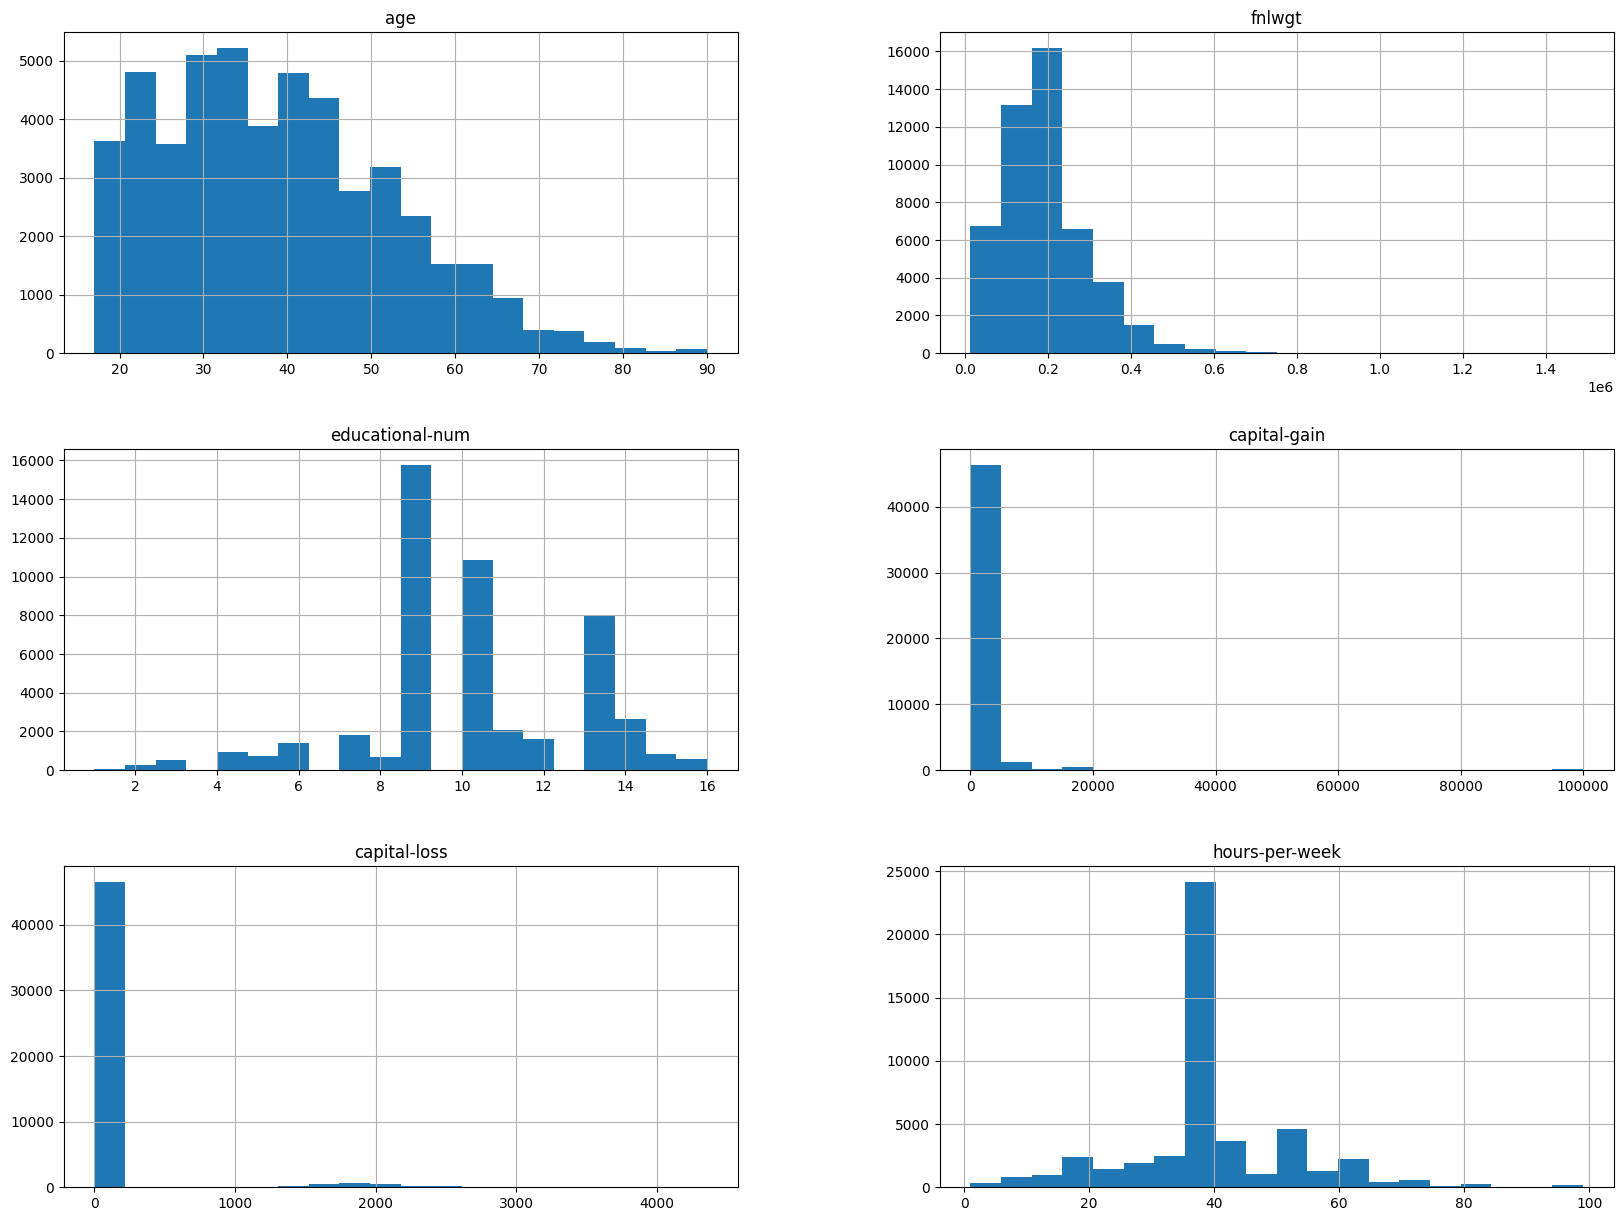

In [11]:
numerical_subset.hist(bins=20, figsize=(20, 15))
plt.show()

## Data Cleaning
After we have explored the overview of the dataset, we are going to dig out 
any anomaly in the dataset and clean it out.

In [12]:
adult_df = adult_df.fillna(adult_df.mode().iloc[0])
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


The Non-Null Count shows there's no more missing value from the dataset, it filled by the most_frequent value

In [13]:
print(numerical_subset.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


Well, from the column capital-gain, the maximum value is 99999 which seems like little bit werid, we can check the dataset description, the capital-gain means the additional income from capital market, such as stocks, securities, 99999 indicated somebody wrongly imput or it repersented as None additional income, here we can try to replace it with the mean value, and we will replace the 99 hours in the hours-per-week column also

In [14]:
print(f"There's {adult_df[adult_df['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")
print(f"There's {adult_df[adult_df['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

There's 244 outlier in the capital-gain column
There's 137 outlier in the hours-per-week column


In [15]:
adult_df['capital-gain'].replace(99999, np.mean(adult_df['capital-gain'].values), inplace=True)
adult_df['hours-per-week'].replace(99, np.mean(adult_df['hours-per-week'].values), inplace=True)
print(adult_df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089    584.893278   
std       13.710510  1.056040e+05         2.570973   2530.549506   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  41310.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.258074  
std      403.004552       11.995662  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       98.000000  


After the data exploration and cleaning, we save the cleaned DataFrame to adult_cleaned.csv file

In [16]:
adult_df.to_csv(r'C:\Users\MILES\Desktop\Projects\Income_classifier\data\adult_cleaned.csv', index=False)


Baseline Model Result
We will evaluate candidate models using repeated stratified k-fold cross-validation

The k-fold cross-validation procedure provides a good general estimate of model performance that is not too optimistically biased, at least compared to a single train-test split. We will use k=10, meaning each fold will contain about 45,222/10, or about 4,522 examples.

Stratified means that each fold will contain the same mixture of examples by class, that is about 75% to 25% for the majority and minority classes respectively. Repeated means that the evaluation process will be performed multiple times to help avoid fluke results and better capture the variance of the chosen model. We will use three repeats.

This means a single model will be fit and evaluated 10 * 3 or 30 times and the mean and standard deviation of these runs will be reported.

This can be achieved using the RepeatedStratifiedKFold scikit-learn class.

We will predict a class label for each example and measure model performance using classification accuracy.

The evaluate_model() function below will take the loaded dataset and a defined model and will evaluate it using repeated stratified k-fold cross-validation, then return a list of accuracy scores that can later be summarized.

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    
    return X, y, cate_index, num_index

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    return scores

In [18]:
from sklearn.dummy import DummyClassifier

X, y, cate_index, num_index = load_dataset(r'C:\Users\MILES\Desktop\Projects\Income_classifier\data\adult_cleaned.csv')
model = DummyClassifier(strategy='most_frequent')

In [19]:
scores = evaluate_model(X, y, model)
print(scores)

[0.76069601 0.76069601 0.76085176 0.76085176 0.76085176 0.76064701
 0.76064701 0.76064701 0.76064701 0.76064701 0.76069601 0.76069601
 0.76085176 0.76085176 0.76085176 0.76064701 0.76064701 0.76064701
 0.76064701 0.76064701 0.76069601 0.76069601 0.76085176 0.76085176
 0.76085176 0.76064701 0.76064701 0.76064701 0.76064701 0.76064701]


In [20]:
print(f"The Dummy Classifier mean accuracy: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {np.std(scores):.2f}")

The Dummy Classifier mean accuracy: 76.07%, with Standard Deviation: 0.00


In [21]:
print(f"The type of dataset: {type(X)}.")
print(f"The shape of the dataset: Row: {X.shape[0]}, with {X.shape[1]} fetures")
print(f"The type of the target label: {type(y)}")
print(f"The shape of the target label is: {y.shape[0]} dimensional vector.")

The type of dataset: <class 'pandas.core.frame.DataFrame'>.
The shape of the dataset: Row: 48842, with 14 fetures
The type of the target label: <class 'numpy.ndarray'>
The shape of the target label is: 48842 dimensional vector.


## Note::
Now that we have a test harness and a baseline in performance. In this case, we can see that the baseline algorithm achieves an accuracy of about **76.07%**. This score provides a lower limit on model skill; any model that achieves an average accuracy above about **76.07%** has skill, whereas models that achieve a score below this value do not have skill on this dataset. Now we can begin to evaluate some models on this dataset

## Model Evaluate and Fine Turn

### Evaluate Machine Learning Algorithms

Let’s start by evaluating a mixture of machine learning models on the dataset.

It can be a good idea to spot check a suite of different nonlinear algorithms o
n a dataset to quickly flush out what works well and deserves further attention, and what doesn’t.

We will evaluate the following machine learning models on the adult data


- Decision Tree (CART)
- Support Vector Machine (SVM)
- Bagged Decision Trees (BAG)
- Random Forest (RF)
- Gradient Boosting Machine
- 
  We plan to use default hyperparameters for most of the models, except for the ensemble algorithms where we will set the number of trees to 100, which is a reasonable default. We will define each model and add them to a list for sequential evaluation. The function "generate_models()" below specifies the list of models to be evaluated and also creates a list of short names for plotting the results later on. (GBM)GBM)set:

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    return X, y, cate_index, num_index

X, y, cate_index, num_index = load_dataset(r'C:\Users\MILES\Desktop\Projects\Income_classifier\data\adult_cleaned.csv')
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(48842, 14)
<class 'numpy.ndarray'>
(48842,)


In [23]:
def generate_models():
    models, names = [], []
    names.append('CART')
    models.append(DecisionTreeClassifier())
    names.append('SVM')
    models.append(SVC(gamma='scale'))
    names.append('BAG')
    models.append(BaggingClassifier(n_estimators=100))
    names.append('RF')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('GBM')
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('Neural Network')
    models.append(MLPClassifier(early_stopping=True))
    return models, names

models, names = generate_models()

As now the X array still in pandas DataFrame with categorical values, here we need to "encoding" the categorical values into numerical values, OneHotEncoder with Scikit-Learn Pipeline are quite handy

In [24]:
steps = [('Categorical', OneHotEncoder(handle_unknown='ignore'), cate_index), ('Numerical', MinMaxScaler(), num_index)]

from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(steps, verbose=True)
X = transformer.fit_transform(X)

print(type(X))
print(X.shape)

[ColumnTransformer] ... (1 of 2) Processing Categorical, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing Numerical, total=   0.0s
<class 'scipy.sparse._csr.csr_matrix'>
(48842, 105)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34189, 105)
(14653, 105)
(34189,)
(14653,)


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
for i in range(len(models)):
    
    print(f"""
    ********************************
     Now evaluating {names[i]} model
    ********************************\n""")
    
    scores = evaluate_model(X_train, y_train, models[i])
    print(f"The {names[i]} model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")


    ********************************
     Now evaluating CART model
    ********************************

The CART model average accuracy is: 81.11%, with Standard Deviation: 0.58.

    ********************************
     Now evaluating SVM model
    ********************************

The SVM model average accuracy is: 84.61%, with Standard Deviation: 0.61.

    ********************************
     Now evaluating BAG model
    ********************************

The BAG model average accuracy is: 85.26%, with Standard Deviation: 0.51.

    ********************************
     Now evaluating RF model
    ********************************

The RF model average accuracy is: 85.02%, with Standard Deviation: 0.47.

    ********************************
     Now evaluating GBM model
    ********************************

The GBM model average accuracy is: 86.31%, with Standard Deviation: 0.47.

    ********************************
     Now evaluating Neural Network model
    *****************

In this case, we can see that all of the chosen algorithms are skillful, achieving a classification accuracy above 76.07%. We can see that the ensemble decision tree algorithms perform the best with perhaps stochastic gradient boosting performing the best with a classification accuracy of about 86.3%.

This accuracy is using the default Hyperperameter, we can pick two top performance algorithms to use scikit-learn GridSearch() to fine turn the Hyperperameter to see whether it can get better performance.

The best two performance algorithms:

- BaggingClassfier(n_estimators=100)
- GradientBoostingClassfier(n_estimators=100)
We can try to fine turn this two model.

In [28]:
from sklearn.model_selection import GridSearchCV

BAGgrid = {'n_estimators': [100, 200]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
BAGclf = BaggingClassifier()
BAGgrid_search = GridSearchCV(estimator=BAGclf, param_grid=BAGgrid, n_jobs=-1, cv=cv, 
                              scoring='accuracy', error_score=0)
BAGgrid_result = BAGgrid_search.fit(X_train, y_train)

In [32]:
print(BAGgrid_result.best_score_)
print(BAGgrid_result.best_params_)

0.8513411040515017
{'n_estimators': 100}


In [33]:
GBMgrid = {'n_estimators': [100, 200]}
GBMclf = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, 
                                    max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)
GBMgrid_search = GridSearchCV(estimator=GBMclf, param_grid=GBMgrid, n_jobs=-1, cv=cv,
                              scoring='accuracy', error_score=0)
GBMgrid_result = GBMgrid_search.fit(X_train, y_train)
print(GBMgrid_result.best_score_)
print(GBMgrid_result.best_params_)

0.8672233750574261
{'n_estimators': 200}


Well, seems like if the n_estimators is equal to 200, the
GradientBoostingClassifier performance incrase to **86.69%**, then we can
update our hyperparameter for GradientBoostingClassfier and train it
according to our Training Subset, now we have the winner, is
GradientBoostingClassifier algorithm.
Actually using **GridSearchCV** is quite computational expensive, I would
suggest to use Cloud Notebook Envirnoment, such Google Colab, AWS, or
Google Cloud or Gradient, or Kaggle, both of them provide quite power CPU
and tons of memory, and most important, they provide free GPU in certain
amount of time

**Final**: Train the **best model**, **save it**, for future use or 
deliver to customer

We pick GradientBoostingClassifier as our final model, we will train it with
Training Subset, and see how it goes in Testing Subset, then finally we will
save it and deliver to our customer.


In [34]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, 
                                   max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=200, random_state=42, subsample=0.8)

In [35]:
TestScore = model.score(X_test, y_test)
print(f"The model test set accuracy is: {(TestScore*100):.1f}%.")


The model test set accuracy is: 87.4%.


In [36]:
from sklearn.metrics import classification_report
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11147
           1       0.79      0.65      0.71      3506

    accuracy                           0.87     14653
   macro avg       0.84      0.80      0.82     14653
weighted avg       0.87      0.87      0.87     14653



In [38]:
import joblib
joblib.dump(model, r'C:\Users\MILES\Desktop\Projects\Income_classifier\final_model.sav')

['C:\\Users\\MILES\\Desktop\\Projects\\Income_classifier\\final_model.sav']